In [ ]:
# SYMPY code for ee-Z-WW (s-channel) amplitude and total cross-section

In [46]:
#!python -m pip install sympy

In [47]:
from sympy import *
import prof_berger.heppackv0 as hep 


### Auxiliary Functions

In [48]:
# Function to search for a symbol in a expression
def find_symbol(expr, target: str):
    for symbol in expr.free_symbols:
        if symbol.name == target:
            return symbol
    print(f"Symbol {target} not found. \n The symbols in the expression are {expr.free_symbols}")
    return None

# Unify the symbols of different expressions
def unify_symbols(expr1, expr2):
    symbols_expr1 = set([x.name for x in expr1.free_symbols])
    symbols_expr2 = set([x.name for x in expr2.free_symbols])

    common_symbols = symbols_expr1.intersection(symbols_expr2)
    #print(common_symbols)

    symbol_mapping = {}
    for symbol in common_symbols:
        new_symbol = Symbol(symbol)
        symbol_mapping[symbol] = new_symbol

    #print(symbol_mapping)
    expr1 = expr1.subs(symbol_mapping)
    expr2 = expr2.subs(symbol_mapping)

    return expr1, expr2

# Define LaTeX expressions
# Parse the LaTeX expressions - EXAMPLE
# Unify symbols with the same text names
#unified_expr1, unified_expr2 = unify_symbols(expr1, expr2)
#dl.replace(dl.args[1].args[0], n)
#print("Unified Expression 1:", unified_expr1)
#print("Unified Expression 2:", unified_expr2)

# Steps for SYMPY calculation

Triple-vertex for Z -> WW calculation  


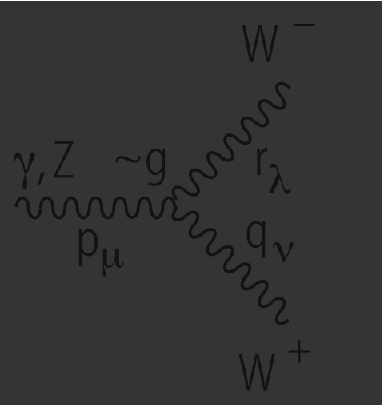

--> The following calculations were based on Prof. Christoph Berger work and functions for HEP calculation on Sympy.

-> Modifications by me, for the original, see his notebooks. https://profchristophberger.com/lehrbuch-elementarteilchenphysik/python/

---
---
---

## Process: $\nu_e(p_1)+\bar \nu_e(p_2)\to Z(q) \to W^-_0(k_1)+W^+_0(k_2)$

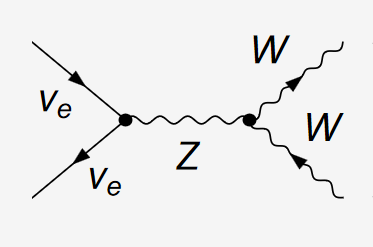

### Symbols, vectors and constants


In [49]:
## latex symbols doesn't need "$" 
theta, r = symbols('theta r', positive=True)

s, t, u, p, s0, t0, u0, phi, P, Gamma = symbols('s t u p s_0 t_0 u_0 phi P Gamma', real=True, positive=True)

EN, MZ, MW, me= symbols(r'EN M_{Z} M_{W} m_{e}', real=True, positive=True)

# Electroweak constants
cv, ca, gz, gw, thetaw, gz_theta, gw_theta = symbols(r'c_v c_a g_Z g_W theta_W g_Z_theta g_W_theta', real=True, positive=True )


In [50]:
# 2 -> 2 process, p1, p2 -> q -> k1, k2
p1 = Matrix([sqrt(s)/2, 0, 0, 0])
p2 = Matrix([sqrt(s)/2, 0, pi, pi])
k1 = Matrix([sqrt(s)/2, MW, theta, 0])
k2 = Matrix([sqrt(s)/2, MW, pi-theta, pi])




### Premisses

According to the examples of Prof. Berger, we can define two currents and obtain the corresponding amplitude through the dot product between the two, without the need for any tricks, averages, or trace properties of gamma matrices.
Furthermore, the propagators are already included in the currents, so just multiply "one side by the other" of the diagram to obtain the corresponding amplitude.

The amplitude for the process we are interested in can be written according to the equation below, taken from the Quigg book.

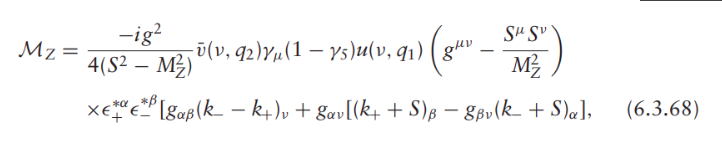

Where the full form of the Z boson propagator (a massive vector mediator), is given by

$$\frac{g_{{\mu\nu}}-q_{{\mu}}q_{{\nu}}/M^{2}_{W}}{s-M^{2}_{W}+\mathrm{i}M_W\Gamma_W}$$

###  

In [51]:
## Breit-Wigner denominator, to be added in the end of the calculation for simplicity. 
denom = ((s - MZ**2)**2 + (MZ * Gamma)**2);denom

#### Mandelstam kinematics

In [52]:
## s, t, u definition

fp1 = hep.fourvec(p1)
fp2 = hep.fourvec(p2)
fk1 = hep.fourvec(k1)
fk2 = hep.fourvec(k2)

sm = hep.dotprod4(fp1 + fp2, fp1 + fp2)
tm = hep.dotprod4(fp1 - fk1, fp1 - fk1)
um = hep.dotprod4(fp1 - fk2, fp1 - fk2)


In [ ]:
q_med = fp1 + fp2
mmed = MZ

#Routine for evaluating all helicities at once

jW_hel = []

for h1 in [-1, 1]:
    for h2 in [-1, 1]:
        jW_hel.append(hep.vbuwMB_noqq(p2, h2, p1, h1, q_med, mmed, cv, ca))  ## vbuwMB_noqq is a modification of Prof. Berger's "hep.vbuva" for the current process 

V3_hel = []
for h1 in [-1, 0, 1]:
    for h2 in [-1, 0, 1]:
        V3_hel.append(hep.V3ZOutOut_noqq(k1, h2, k2, h1, q_med, mmed, cv, ca)) ## V3ZOutOut_noqq is a modification of Prof. Berger's "hep.V3gOutOut" for the current process 

In [54]:
# # Same above, but here the currents have the complete mediator expression, without any approximations

# q_mediator = fp1 + fp2
# mmed = MZ

# jW_hel = []

# for h1 in [-1, 1]:
#     for h2 in [-1, 1]:
#         jW_hel.append(hep.vbuwMB(p2, h2, p1, h1, q_mediator, mmed, cv, ca))

# V3_hel = []
# for h1 in [-1, 0, 1]:
#     for h2 in [-1, 0, 1]:
#         V3_hel.append(hep.V3ZOutOut(k1, h2, k2, h1, q_mediator, mmed, cv, ca))

In [55]:
## Get the dot product of the two currents, for all helicities

Tn = []

for jW in jW_hel:
    for V3 in V3_hel:

        Tn.append(simplify(hep.dotprod4(jW , V3)))

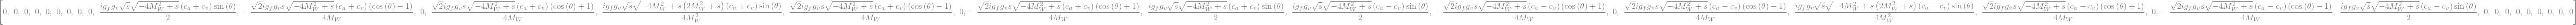

In [56]:
# Tn is a list with all terms, including the vanishing ones, from the dot product of the currents 
Tn

In [57]:
# Some auxiliar variables
beta, xi = symbols(r'beta xi', real=True, positive=True)

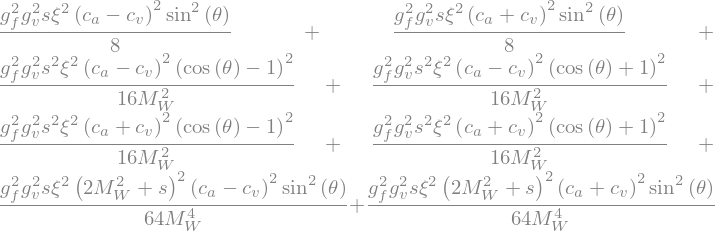

In [59]:
# Summing over outgoing and averaging over incoming helicities we thus get for the average of squared amplitudes
Tres = 0

for T in Tn:
    res = T.subs(sm, s).subs(sqrt(s - 4*MW**2), xi)
    Tres +=  res * conjugate(res) ## Summing Squared

# Summing over outgoing and averaging over incoming helicities we thus get for the average of squared amplitudes
Tres = Tres / 4 # Averaging over the incoming helicities
Tres

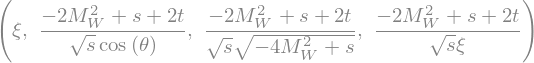

In [65]:
## Here we make some substitutions based on the Mandelstam variables kinematics 


sCM = 4*EN**2

tCM = me**2 + MW**2 - 2*EN**2 + 2*sqrt(EN**2 - me**2) * sqrt(EN**2-MW**2) * cos(theta)
tCM = tCM.subs(EN, sqrt(s)/2).subs(sqrt(s - 4*MW**2), xi).subs(sqrt(s - MZ**2), xi)

# t0CM= tCM - m**2 - MW**2

cost = solve(tm - t, cos(theta))
cost = simplify(cost[0])  #.subs(sqrt(s - 4*MW**2), xi)

cost_xi = simplify(cost).subs(sqrt(s - 4*MW**2), xi)
xi_t = solve(cost_xi - cos(theta), xi)[0]

xi, xi_t, cost, cost_xi


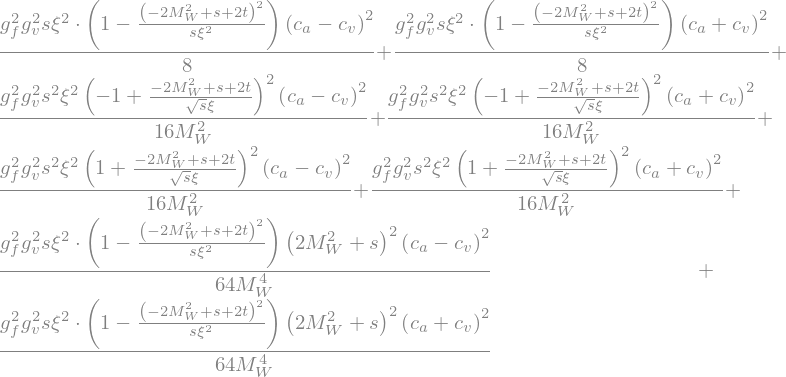

In [67]:
# More substituions, to get rid of the trigonometric functions
Tres_m = Tres 
Tres_m = Tres_m.subs(sin(theta), sqrt(1 - cost_xi**2)).subs(cos(theta), cost_xi).subs(EN**2, s/4).subs(me, 0); Tres_m 

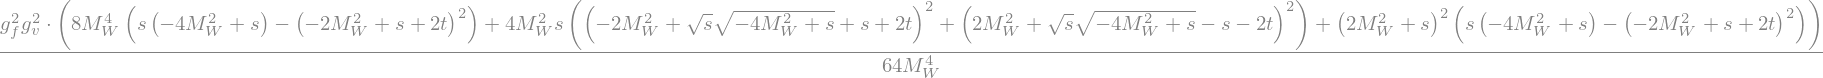

In [68]:
## Simplifications, impliying c_v and c_a for neutrino pairs (for other fermions, just replace it for the correct Electroweak coupling)

Tres_simp = simplify(Tres_m)

## Find the c_v and c_a symbols inside the expression
cvv = find_symbol(Tres_simp, 'c_v')
caa = find_symbol(Tres_simp, 'c_a')

Tres_simp = simplify(Tres_simp.subs(cvv, 1/2).subs(caa, 1/2)) ## replace by 1/2, for a incoming neutrino pair
Tres_simp = nsimplify(Tres_simp).subs(xi, sqrt(s - 4*MW**2))  ## simplify
Tres_simp

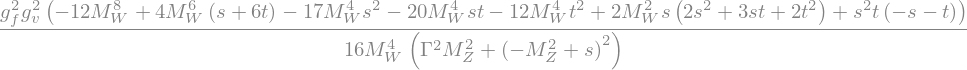

In [70]:
Tres_simp = nsimplify(expand(Tres_simp))

## Some functions to give a pretier expression
amp_squared =  together(collect(nsimplify(expand(collect(Tres_simp, MW))), MW)) / denom 

amp_squared

In [71]:
## hocus pocus to factor (-1) out from the expression

amp_squaredm = - amp_squared
amp_squaredm = -1 * simplify(amp_squaredm) 

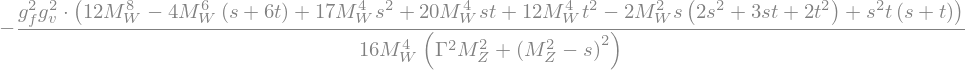

In [72]:
amp_squaredm

Squared amplitude result for the same process via FeynCalc, using Mathematica

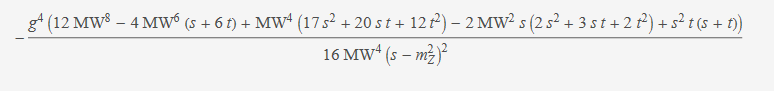

### $\frac{d \sigma}{dt}$ expression

In [112]:
#dsig_dt

# Golden factor  16\pi(s-m^2)^2
prefactor = 16*pi*(s-me**2)**2
prefactor = prefactor.subs(me, 0); prefactor

In [113]:
tlower = ((- MW**2 + s/2)*2) / sqrt(s) * xi
tupper = ((1 - MW**2 + s/2)*2) / sqrt(s) * xi

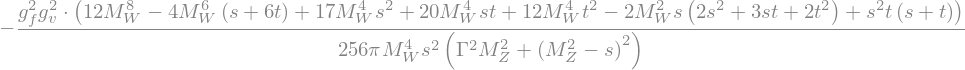

In [117]:
dsig_dt =  amp_squaredm / prefactor
dsig_dt
# dsig_dOHM =  amp_squaredm_ohm / factor *  denom

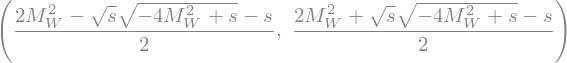

In [118]:
## Integration limits in function of t
tUpper = (1/2) * (2*me**2 + 2*MW**2 - s + sqrt((s - 4*me**2)*(s - 4*MW**2)))
tLower = (1/2) * (2*me**2 + 2*MW**2 - s - sqrt((s - 4*me**2)*(s - 4*MW**2)))


tlower = together(nsimplify(tLower.subs(me, 0))) 
tupper = together(nsimplify(tUpper.subs(me, 0))) 

tlower, tupper

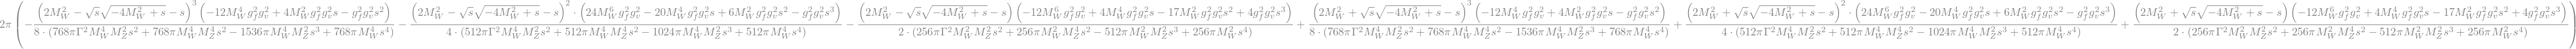

In [119]:
totalxsect = 2*pi * integrate(dsig_dt, (t, tlower, tupper))
totalxsect

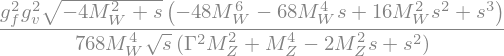

In [120]:
totalxsec = simplify(totalxsect)
totalxsec

In [140]:
# Prettier...
totalxsec = simplify(expand(totalxsec * denom)) / denom

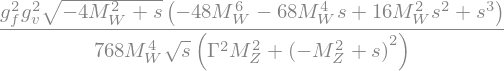

In [142]:
totalxsec

In [143]:
latex(totalxsec)

'\\frac{g_{f}^{2} g_{v}^{2} \\sqrt{- 4 M_{W}^{2} + s} \\left(- 48 M_{W}^{6} - 68 M_{W}^{4} s + 16 M_{W}^{2} s^{2} + s^{3}\\right)}{768 M_{W}^{4} \\sqrt{s} \\left(\\Gamma^{2} M_{Z}^{2} + \\left(- M_{Z}^{2} + s\\right)^{2}\\right)}'

$$ \sigma_{\nu_e \bar \nu_e \to Z \to W^+ W^-} = \frac{g_{f}^{2} g_{v}^{2} \sqrt{- 4 M_{W}^{2} + s} \left(- 48 M_{W}^{6} - 68 M_{W}^{4} s + 16 M_{W}^{2} s^{2} + s^{3}\right)}{768 M_{W}^{4} \sqrt{s} \left(\Gamma^{2} M_{Z}^{2} + \left(- M_{Z}^{2} + s\right)^{2}\right)} $$